Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
Hands-on Activity 11.1 | Prepare a Dataset for LSTM and CNN
Name | Catorce, Mayah Mae A.
Section | CPE32S3
Date Performed: |May 4, 2024
Date Submitted: |May 10, 2024
Instructor: | Engr. Roman Richard

## Load the dataset and examine it. 

In [20]:
import pandas as pd

IBM = pd.read_csv("C:/Users/Mayah/Downloads/IBM_2006-01-01_to_2018-01-01.csv")


In [21]:
IBM.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
1,2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2,2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
3,2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
4,2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [22]:
IBM.tail()

,Date,Open,High,Low,Close,Volume,Name
3015,2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
3016,2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
3017,2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
3018,2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM
3019,2017-12-29,154.17,154.72,153.42,153.42,3327087,IBM


In [23]:
IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB


In [24]:
IBM.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03
mean,145.515545,146.681738,144.471597,145.617278,5.773301e+06
std,37.554946,37.613446,37.477641,37.529387,3.192831e+06
min,72.740000,73.940000,69.500000,71.740000,2.542560e+05
25%,116.405000,117.765000,115.490000,116.525000,3.622681e+06
50%,149.610000,150.330000,148.470000,149.315000,4.928852e+06
75%,178.445000,179.762500,177.330000,178.685000,6.965014e+06
max,215.380000,215.900000,214.300000,215.800000,3.077428e+07


In [25]:
IBM.shape

(3020, 7)

In [26]:
IBM.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object

In [27]:
print("Unique values:")
for column in IBM.columns:
    if IBM[column].dtype == 'object':
        print(column, IBM[column].nunique())

Unique values:
Date 3020
Name 1


### Analysis

The dataset is loaded and I performed checking the head and tail of the dataset, info, describe, shape, dtypes, and unique values in order to know and understand what does this dataset have.

## Check for missing values. 

In [28]:
null_counts = IBM.isnull().sum()

print("Null Value Counts:")
print(null_counts)

Null Value Counts:
Date      0
Open      1
High      0
Low       1
Close     0
Volume    0
Name      0
dtype: int64


In [29]:
IBM_filled = IBM.fillna(IBM.mean)

In [30]:
null_counts = IBM_filled.isnull().sum()

print("Null Value Counts:")
print(null_counts)

Null Value Counts:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64


### Analysis
Upon checking for the missing values, I have found 1 missing value each in the column Open and Low. Therefore I filled them with their mean value. 

## Satisfy the following condition: Training set (before 2017) and Test set (2017 and beyond)


In [31]:
IBM['Date'] = pd.to_datetime(IBM['Date'])

train_set = IBM[IBM['Date'].dt.year < 2017]
test_set = IBM[IBM['Date'].dt.year >= 2017]

### Analysis
In this part, I have splitted the data based on the year, with the training set containing the data from before the year 2017 and the test data after 2017. With this, the model is trained on past data and tested using the future data.

## Scale the training set from 0 to 1 using MinMaxScaler:

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_set['Close'].values.reshape(-1, 1))


### Analysis
MinMaxScaler has been used to scale the training set, which is a common preprocessing step for neural network models. Scaling the data to a range between 0 and 1 helps in stabilizing the training process and can improve the performance of the model.

## Create a data structure with 60 timesteps and 1 output for LSTM:


In [33]:
import numpy as np

X_train = []
y_train = []

for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


### Analysis
In preparing the data for LSTM modelling, I created a data structure with 60 timestamps and 1 output. With this, in each element of the training set, there are 60 previous training set elements. It is a significant function in LSTM because it stores long-term memory states.

## Reshape the X_train for efficient modeling:


In [34]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


### Analysis
In this part, I have reshaped the X_train data to produce efficient modelling and in order to ensure that it is in the correct format expected by the LSTM. 

## Plot

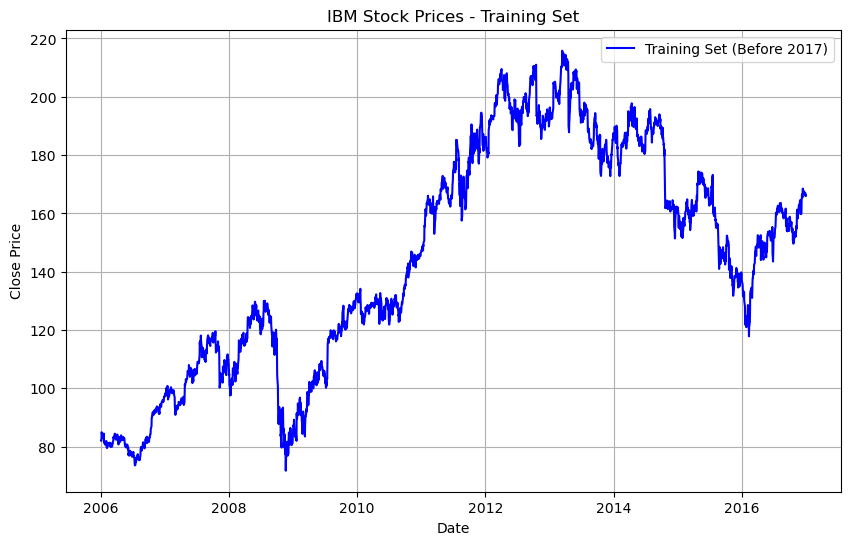

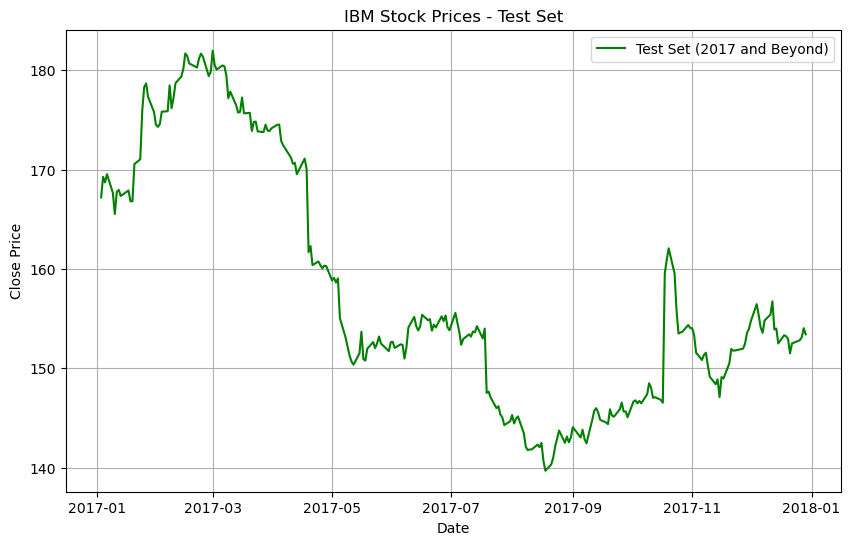

In [35]:
import matplotlib.pyplot as plt

IBM['Date'] = pd.to_datetime(IBM['Date'])

train_set = IBM[IBM['Date'].dt.year < 2017]
test_set = IBM[IBM['Date'].dt.year >= 2017]

#training set
plt.figure(figsize=(10, 6))
plt.plot(train_set['Date'], train_set['Close'], label='Training Set (Before 2017)', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('IBM Stock Prices - Training Set')
plt.legend()
plt.grid(True)
plt.show()

#test set
plt.figure(figsize=(10, 6))
plt.plot(test_set['Date'], test_set['Close'], label='Test Set (2017 and Beyond)', color='green')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('IBM Stock Prices - Test Set')
plt.legend()
plt.grid(True)
plt.show()


### Analysis
This plot displays the historical performance of IBM stock showing various fluctuations and trends overtime. It serves as the historical data used to train the forecasting model, capturing patterns and relationships in the data.

## Conclusion

Upon finishing the activity, I have been able to prepare a dataset and demonstrate it for LSTM and CNN time series forecasting. I have been able to get a dataset ready for predicting IBM stock prices, loaded the data, checked if there are null values, satisfied the condition of splitting the dataset for train and test before the year 201 and beyond. This activity helped me understand how the future predictions are made and processed by deep learning techniques. With this I got to know the important steps needed to get a dataset for predicting future stock prices accurately.